<a href="https://colab.research.google.com/github/aaptecode/DS-Unit-4-Sprint-2-NLP/blob/master/LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

## Scraping Procedure

Source: https://medium.com/@msalmon00/web-scraping-job-postings-from-indeed-96bd588dcb4b

In [0]:
##### Your Code Here #####

import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time

### Extra Work

In [3]:
URL = 'https://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10'

#conducting a request of the stated URL above:
page = requests.get(URL)

#specifying a desired format of “page” using the html parser - this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, 'html.parser')

#printing soup in a more structured tree format that makes for easier reading
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/e8e398d/en_US.js" type="text/javascript">
  </script>
  <script>
   !function(n){function r(n){for(var r=a,t=n.length;t;)r=33*r^n.charCodeAt(--t);return r>>>0}var t=this['indeed.i18n.localeData'],e=t['']||{},a=e.salt;if(e.hasOwnProperty('salt'))for(var i in n)t[function(n){var t=r(n);return e.hasOwnProperty('id_length')&&(t=String(t).substring(0,e.id_length)),t}(i)]=n[i];else for(var i in n)t[i]=[null].concat(n[i])}({"indeedapply_serp_label":["Express apply"]});
  </script>
  <link href="/s/97464e7/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York State" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="only screen and (max-width: 640px

**Job Title**

In [4]:
def extract_job_title_from_result(soup): 
    jobs = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}):
            jobs.append(a['title'])
    return(jobs)

extract_job_title_from_result(soup)

['Staff Data Scientist - Technology - New York, NY',
 'Data Scientist (Data Startup)',
 'AI Scientist',
 'Research Scientist - Biochemistry',
 'Data Scientist I',
 'Research Intern - Machine Learning at Microsoft Research NYC',
 'Data Scientist Intern',
 'Summer 2019 Internship in Quantitative Data Analysis',
 'Research Analyst, People Analytics',
 'OACE-001-Modeling and Data Analysis Intern',
 'Data Technician (Full- or Part-Time)',
 'Associate Data Scientist',
 'Data Scientist, Sales',
 'Research Intern - Microsoft Research FATE & Microsoft Office',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist/Data Science Instructor']

**Company Name**

In [5]:
def extract_company_from_result(soup): 
    companies = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        company = div.find_all(name='span', attrs={'class':'company'})
        if len(company) > 0:
            for b in company:
                companies.append(b.text.strip())
        else:
            sec_try = div.find_all(name='span', attrs={'class':'result-link-source'})
        for span in sec_try:
            companies.append(span.text.strip())
            
    return(companies)
 
extract_company_from_result(soup)

['Finra',
 'Averity',
 'Accrete.AI',
 'Ichor Therapeutics Inc',
 'AIG',
 'Microsoft',
 'IBM',
 'Clearpool Group',
 'Google',
 'New York City DEPT OF ENVIRONMENT PROTECTION',
 'Thasos Group',
 'Viacom',
 'Slack',
 'Microsoft',
 'PepsiCo',
 'Ascensia Diabetes Care',
 'NYC Data Science Academy']

**Location**

In [6]:
def extract_location_from_result(soup): 
    locations = []
    spans = soup.findAll('span', attrs={'class': 'location'})
    for span in spans:
        locations.append(span.text)
    return(locations)

extract_location_from_result(soup)

['New York, NY 10022 (Midtown area)',
 'Armonk, NY 10504',
 'New York, NY',
 'New York, NY 10011 (Chelsea area)',
 'Queens, NY',
 'New York, NY',
 'New York, NY 10036',
 'New York, NY',
 'New York, NY 10022 (Midtown area)',
 'New York, NY 10017 (Midtown area)']

**Salary**

In [0]:
# def extract_salary_from_result(soup): 
#     salaries = []
#     for div in soup.find_all(name='div', attrs={'class':'row'}):
#         try:
#             salaries.append(div.find('nobr').text)
#         except:
#             try:
#                 div_two = div.find(name='div', attrs={'class':'sjcl'})
#                 div_three = div_two.find('div')
#                 salaries.append(div_three.text.strip())
#             except:
#                 salaries.append('None Given')
#     return(salaries)

# extract_salary_from_result(soup)

**Summary**

In [7]:
def extract_summary_from_result(soup): 
    summaries = []
    spans = soup.findAll('span', attrs={'class': 'summary'})
    for span in spans:
        summaries.append(span.text.strip())       
    return(summaries)

extract_summary_from_result(soup)

['Collaborate with Data Engineers to specify Data Framework features. A Staff Data Scientist for Market Regulation Technology will support the establishment of...',
 'We are growing quickly and need the brainpower and curiosity of great Data Scientists to help us grow. Experience using alternative data in a production...',
 'Experience working with datasets, and strong interest in deep data analysis – you need to be a detective at heart....',
 'The position will require meticulous documentation effective presentation of methods and data both in written and oral formats....',
 'Data Scientists collaborate with AIG’s Life and Retirement businesses across multiple functions, including product, distribution, marketing, operations, and...',
 'Microsoft Research provides a dynamic environment for research careers with a network of world-class research labs led by globally-recognized scientists and...',
 'You will work alongside consultants, managers, and data scientists to enhance business p

### Scraper

In [0]:
max_results_per_city = 100
city_set = ['New+York','Chicago','San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 
            'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 'Portland', 'Phoenix', 
            'Denver', 'Houston', 'Miami', 'Washington+DC', 'Boulder']


columns = ['city','job_title', 'company_name', 'location', 'summary']
indeed_df = pd.DataFrame(columns = columns)

In [24]:
indeed_df.head() # Empty DataFrame

,city,job_title,company_name,location,summary


In [25]:
%%time

# city_set = ['New+York','Chicago','San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Washington+DC', 'Boulder']

max_results_per_city = 100
job = 'data scientist'
job = job.replace(' ','+').lower()

baseURL = 'http://www.indeed.com/jobs?q=' # data+scientist '+%2420%2C000&l='
addOn1 = '+%2420%2C000&l='
addOn2 = '&start='

for city in city_set:
    for start in range(0, max_results_per_city, 10):
        page = requests.get(baseURL + str(job) + addOn1 + str(city) + addOn2 + str(start))
        time.sleep(1)
        soup = BeautifulSoup(page.text, 'lxml', from_encoding='utf-8')
        
    for div in soup.find_all(name='div', attrs={'class':'row'}): 
        #specifying row num for index of job posting in dataframe
        num = (len(indeed_df) + 1) 
        
        #creating an empty list to hold the data for each posting
#         job_post = [] 
        job_post = {}
        
        #append city name
#         job_post.append(city)
        job_post['city'] = city.replace('+',' ').upper()
        
        #grabbing job title
        for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}):
            job_post['job_title'] = a['title']
#             job_post.append(a['title']) 
            
        #grabbing company name
        company = div.find_all(name='span', attrs={'class':'company'}) 
        if len(company) > 0: 
            for b in company:
                job_post['company_name'] = b.text.strip()
#                 job_post.append(b.text.strip()) 
        else: 
            sec_try = div.find_all(name='span', attrs={'class':'result-link-source'})
            for span in sec_try:
                job_post['company_name'] = span.text
#                 job_post.append(span.text) 
                
        #grabbing location name
        c = div.findAll('span', attrs={'class': 'location'}) 
        for span in c: 
            job_post['location'] = span.text
#             job_post.append(span.text) 
            
        #grabbing summary text
        d = div.findAll('span', attrs={'class': 'summary'}) 
        for span in d:
            job_post['summary'] = span.text.strip()
#             job_post.append(span.text.strip()) 

#         sample_df.loc[num] = job_post
        indeed_df = pd.concat([indeed_df, pd.DataFrame(job_post, index=[0])], axis=0)

#saving sample_df as a local csv file — define your own local path to save contents 
# sample_df.to_csv(“[filepath].csv”, encoding=’utf-8')                        

#For hit in page_soup.findAll(attrs={‘class’ : ‘company’}):
# print(hit.text.strip())

    #grabbing salary
#     try:
#       job_post.append(div.find(‘nobr’).text) 
#     except:
#       try:
#         div_two = div.find(name=”div”, attrs={“class”:”sjcl”}) 
#         div_three = div_two.find(“div”) 
#         job_post.append(div_three.text.strip())
#       except:
#         job_post.append(“Nothing_found”) 
    #appending list of job post info to dataframe at index num

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:179: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


CPU times: user 17.5 s, sys: 345 ms, total: 17.8 s
Wall time: 4min 9s


In [26]:
job_post

{'city': 'BOULDER',
 'company_name': 'ASSURANCE',
 'job_title': 'Business Development Telephone Representative (Remote)',
 'summary': 'Our team of engineers, data scientists, marketers, architects, and designers are building systems using advanced science to make humans better....'}

In [27]:
len(indeed_df)  #.head()

291

In [28]:
indeed_df.isnull().sum()

city              0
company_name     17
job_title        17
location        121
summary          17
dtype: int64

In [29]:
indeed_df = indeed_df[pd.notnull(indeed_df['job_title'])] # Deletes rows where there are null values for job_title

len(indeed_df)

274

In [0]:
indeed_df.reset_index(inplace=True)



In [31]:
del(indeed_df['index'])
indeed_df.head(20)

,city,company_name,job_title,location,summary
0,NEW YORK,Glassbox,Customer Experience Analyst (Data Scientist),"New York, NY",Glassbox Customer Experience Analytics Team is...
1,NEW YORK,Better,Data Scientist,"New York, NY 10018 (Clinton area)",Migrate our data warehouse to Redshift. The da...
2,NEW YORK,MoneyLion,Data Scientist,"New York, NY",This entails understanding and leveraging our ...
3,NEW YORK,Fractal Analytics,Data Scientist,"New York, NY",Data mining using state-of-the-art methods. In...
4,NEW YORK,Clearpool Group,Summer 2019 Internship in Quantitative Data An...,"New York, NY",Ensure data integrity and construct robust val...
5,NEW YORK,Columbia University,Data and Research Analyst,"New York, NY",Data Quality Management:. Working primarily in...
6,NEW YORK,Rauxa,Data Scientist,"New York, NY",The Data Scientist is part of a team that will...
7,NEW YORK,American Express,Data Scientist - Machine Learning,"New York, NY",Applying rigorious data science and optimizati...
8,NEW YORK,AlphaSights Ltd.,Data Scientist,"New York, NY",A growing team of data scientists with diverse...
9,NEW YORK,Intent Media,Data Scientist,"New York, NY",Experience with handling large amounts of data...


In [33]:
len(indeed_df)-len(indeed_df.drop_duplicates())

0

In [56]:
indeed_df.fillna('None')

,city,company_name,job_title,location,summary
0,NEW YORK,Glassbox,Customer Experience Analyst (Data Scientist),"New York, NY",Glassbox Customer Experience Analytics Team is...
1,NEW YORK,Better,Data Scientist,"New York, NY 10018 (Clinton area)",Migrate our data warehouse to Redshift. The da...
2,NEW YORK,MoneyLion,Data Scientist,"New York, NY",This entails understanding and leveraging our ...
3,NEW YORK,Fractal Analytics,Data Scientist,"New York, NY",Data mining using state-of-the-art methods. In...
4,NEW YORK,Clearpool Group,Summer 2019 Internship in Quantitative Data An...,"New York, NY",Ensure data integrity and construct robust val...
5,NEW YORK,Columbia University,Data and Research Analyst,"New York, NY",Data Quality Management:. Working primarily in...
6,NEW YORK,Rauxa,Data Scientist,"New York, NY",The Data Scientist is part of a team that will...
7,NEW YORK,American Express,Data Scientist - Machine Learning,"New York, NY",Applying rigorious data science and optimizati...
8,NEW YORK,AlphaSights Ltd.,Data Scientist,"New York, NY",A growing team of data scientists with diverse...
9,NEW YORK,Intent Media,Data Scientist,"New York, NY",Experience with handling large amounts of data...


In [57]:
indeed_df.loc[0].tolist()

['NEW YORK',
 'Glassbox',
 'Customer Experience Analyst (Data Scientist)',
 'New York, NY',
 'Glassbox Customer Experience Analytics Team is seeking a Customer Facing Data Scientist work with the sales team to develop client relationships and deliver...']

In [0]:
listings = []

for i in range(len(indeed_df)):
    listings.append(indeed_df.loc[i])

In [59]:
listings

[city                                                     NEW YORK
 company_name                                             Glassbox
 job_title            Customer Experience Analyst (Data Scientist)
 location                                             New York, NY
 summary         Glassbox Customer Experience Analytics Team is...
 Name: 0, dtype: object,
 city                                                     NEW YORK
 company_name                                               Better
 job_title                                          Data Scientist
 location                        New York, NY 10018 (Clinton area)
 summary         Migrate our data warehouse to Redshift. The da...
 Name: 1, dtype: object,
 city                                                     NEW YORK
 company_name                                            MoneyLion
 job_title                                          Data Scientist
 location                                             New York, NY
 summary    

## 2) Use NLTK to tokenize / clean the listings 

In [64]:
##### Your Code Here #####

# sentence_tokens = sent_tokenize(str(listings))
# print(sentence_tokens)

# word_tokens = word_tokenize(str(listings))
# print(word_tokens)


import string
table = str.maketrans('','', string.punctuation)
stop_words = set(stopwords.words('english'))

cleaned_listings = []

for listing in listings:
    print()
    # Tokenize by word
    tokens = word_tokenize(str(listing))
    print("Tokens:", 1.0*len(tokens)/len(tokens), tokens)
  
    # Make all words lowercase
    lowercase_tokens = [w.lower() for w in tokens]
    print("Lowercase:", 1.0*len(lowercase_tokens)/len(tokens), lowercase_tokens)

    # Strip punctuation from within words
    no_punctuation = [x.translate(table) for x in lowercase_tokens]
    print("No Punctuation:", 1.0*len(no_punctuation)/len(tokens), no_punctuation)

    # Remove words that aren't alphabetic
    alphabetic = [word for word in no_punctuation if word.isalpha()]
    print("Alphabetic:", 1.0*len(alphabetic)/len(tokens), alphabetic)

    # Remove stopwords
    words = [w for w in alphabetic if not w in stop_words]
    print("Cleaned Words:", 1.0*len(words)/len(tokens), words)
    print("---------------------------------------------------------------------")
    # Append to list
    cleaned_listings.append(words)


Tokens: 1.0 ['city', 'NEW', 'YORK', 'company_name', 'Glassbox', 'job_title', 'Customer', 'Experience', 'Analyst', '(', 'Data', 'Scientist', ')', 'location', 'New', 'York', ',', 'NY', 'summary', 'Glassbox', 'Customer', 'Experience', 'Analytics', 'Team', 'is', '...', 'Name', ':', '0', ',', 'dtype', ':', 'object']
Lowercase: 1.0 ['city', 'new', 'york', 'company_name', 'glassbox', 'job_title', 'customer', 'experience', 'analyst', '(', 'data', 'scientist', ')', 'location', 'new', 'york', ',', 'ny', 'summary', 'glassbox', 'customer', 'experience', 'analytics', 'team', 'is', '...', 'name', ':', '0', ',', 'dtype', ':', 'object']
No Punctuation: 1.0 ['city', 'new', 'york', 'companyname', 'glassbox', 'jobtitle', 'customer', 'experience', 'analyst', '', 'data', 'scientist', '', 'location', 'new', 'york', '', 'ny', 'summary', 'glassbox', 'customer', 'experience', 'analytics', 'team', 'is', '', 'name', '', '0', '', 'dtype', '', 'object']
Alphabetic: 0.7575757575757576 ['city', 'new', 'york', 'comp

In [65]:
len(cleaned_listings)

274

In [68]:
cleaned_listings[0]

['city',
 'new',
 'york',
 'companyname',
 'glassbox',
 'jobtitle',
 'customer',
 'experience',
 'analyst',
 'data',
 'scientist',
 'location',
 'new',
 'york',
 'ny',
 'summary',
 'glassbox',
 'customer',
 'experience',
 'analytics',
 'team',
 'name',
 'dtype',
 'object']

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [75]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lemmatized_listings = []

for listing in cleaned_listings:
    lemmas = [lemmatizer.lemmatize(word) for word in listing]
    lemmatized_listings.append(lemmas)
  
print(len(lemmatized_listings), lemmatized_listings)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


274 [['city', 'new', 'york', 'companyname', 'glassbox', 'jobtitle', 'customer', 'experience', 'analyst', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'summary', 'glassbox', 'customer', 'experience', 'analytics', 'team', 'name', 'dtype', 'object'], ['city', 'new', 'york', 'companyname', 'better', 'jobtitle', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'clinton', 'area', 'summary', 'migrate', 'data', 'warehouse', 'redshift', 'da', 'name', 'dtype', 'object'], ['city', 'new', 'york', 'companyname', 'moneylion', 'jobtitle', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'summary', 'entail', 'understanding', 'leveraging', 'name', 'dtype', 'object'], ['city', 'new', 'york', 'companyname', 'fractal', 'analytics', 'jobtitle', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'summary', 'data', 'mining', 'using', 'stateoftheart', 'method', 'name', 'dtype', 'object'], ['city', 'new', 'york', 'companyname', 'clearpool', 'group', 'jobtitle', 'summer', 'internship', 'qu

In [93]:
lemmatized_job_listings = []
for listing in lemmatized_listings:
    new_listing = " ".join(listing)
    lemmatized_job_listings.append(new_listing)
  
print(lemmatized_job_listings)

['city new york companyname glassbox jobtitle customer experience analyst data scientist location new york ny summary glassbox customer experience analytics team name dtype object', 'city new york companyname better jobtitle data scientist location new york ny clinton area summary migrate data warehouse redshift da name dtype object', 'city new york companyname moneylion jobtitle data scientist location new york ny summary entail understanding leveraging name dtype object', 'city new york companyname fractal analytics jobtitle data scientist location new york ny summary data mining using stateoftheart method name dtype object', 'city new york companyname clearpool group jobtitle summer internship quantitative data location new york ny summary ensure data integrity construct robust val name dtype object', 'city new york companyname columbia university jobtitle data research analyst location new york ny summary data quality management working primarily name dtype object', 'city new york 

In [95]:
# List of document strings as text
text = lemmatized_job_listings
# Instantiate vectorizer object
vectorizer = CountVectorizer(lowercase=True, ngram_range = (1,2), stop_words='english')
# Create a vocabulary and get word counts per document
bag_of_words = vectorizer.fit_transform(lemmatized_job_listings)
# Print word counts
print(bag_of_words.toarray())

# Get feature names to use as dataframe column headers
feature_names = vectorizer.get_feature_names()

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [97]:
df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
print(df.shape)
df.head()

(274, 3429)


,abbott,abbott laboratory,abi,abi dtype,ability,ability analyze,ability collaborate,ability organize,ability present,academy,...,year experience,year progressive,year quantitative,yearlong,yearlong internship,york,york companyname,york ny,zimmerman,zimmerman advertising
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0


# 4) Visualize the most common word counts

In [76]:
all_the_words = []
for listing in lemmatized_listings:
    for word in listing:
        all_the_words.append(word)
    
print(len(all_the_words), all_the_words)

5904 ['city', 'new', 'york', 'companyname', 'glassbox', 'jobtitle', 'customer', 'experience', 'analyst', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'summary', 'glassbox', 'customer', 'experience', 'analytics', 'team', 'name', 'dtype', 'object', 'city', 'new', 'york', 'companyname', 'better', 'jobtitle', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'clinton', 'area', 'summary', 'migrate', 'data', 'warehouse', 'redshift', 'da', 'name', 'dtype', 'object', 'city', 'new', 'york', 'companyname', 'moneylion', 'jobtitle', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'summary', 'entail', 'understanding', 'leveraging', 'name', 'dtype', 'object', 'city', 'new', 'york', 'companyname', 'fractal', 'analytics', 'jobtitle', 'data', 'scientist', 'location', 'new', 'york', 'ny', 'summary', 'data', 'mining', 'using', 'stateoftheart', 'method', 'name', 'dtype', 'object', 'city', 'new', 'york', 'companyname', 'clearpool', 'group', 'jobtitle', 'summer', 'internship', 'quantitati

In [89]:
fdist = FreqDist(all_the_words)
print(fdist)

fdist.most_common(25)

<FreqDist with 1094 samples and 5904 outcomes>


[('data', 335),
 ('city', 275),
 ('summary', 275),
 ('name', 275),
 ('companyname', 274),
 ('jobtitle', 274),
 ('location', 274),
 ('dtype', 274),
 ('object', 274),
 ('scientist', 225),
 ('nan', 104),
 ('research', 61),
 ('engineer', 50),
 ('area', 46),
 ('analyst', 39),
 ('experience', 33),
 ('new', 32),
 ('tx', 31),
 ('team', 30),
 ('york', 29),
 ('chicago', 29),
 ('denver', 29),
 ('austin', 28),
 ('san', 27),
 ('inc', 26)]

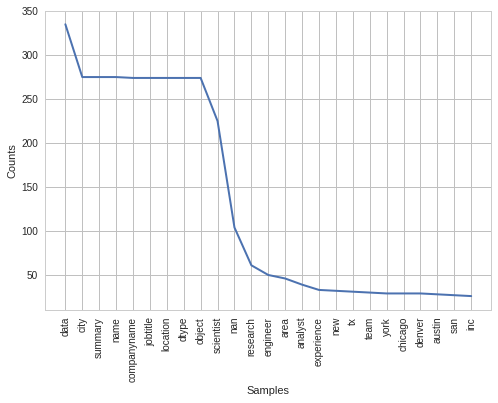

In [88]:
import matplotlib.style as style
style.use('seaborn-whitegrid')

fdist.plot(25, cumulative=False)

plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [101]:
##### Your Code Here #####

# # List of document strings as text
# text = lemmatized_listings
text = lemmatized_job_listings

# Instantiate vectorizer object
tfidf = TfidfVectorizer(lowercase=True, ngram_range = (1,2), stop_words='english') 

# Create a vocabulary and get word counts per document
feature_matrix = tfidf.fit_transform(text)

# Print word counts
print(feature_matrix.toarray())

# Get feature names to use as dataframe column headers
feature_names = tfidf.get_feature_names()

[[0.         0.         0.         ... 0.12693006 0.         0.        ]
 [0.         0.         0.         ... 0.14444392 0.         0.        ]
 [0.         0.         0.         ... 0.16513842 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [102]:
df = pd.DataFrame(feature_matrix.toarray(), columns=feature_names)
print(df.shape)
df.head()

(274, 3429)


,abbott,abbott laboratory,abi,abi dtype,ability,ability analyze,ability collaborate,ability organize,ability present,academy,...,year experience,year progressive,year quantitative,yearlong,yearlong internship,york,york companyname,york ny,zimmerman,zimmerman advertising
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.225627,0.112813,0.126930,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.256759,0.128379,0.144444,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.293545,0.146772,0.165138,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.272552,0.136276,0.153329,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.227441,0.113720,0.127951,0.0,0.0


## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.